In [11]:
import warnings
warnings.filterwarnings(action='ignore')

In [12]:
import tensorflow as tf
keras.__version__

'2.2.4-tf'

In [13]:
import cv2, os, glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from keras.layers import Conv2D, Input, Activation
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from skimage.transform import pyramid_expand
from Subpixel import Subpixel
from DataGenerator import DataGenerator


In [14]:
base_path = r'E:\processed'

x_train_list = sorted(glob.glob(os.path.join(base_path, 'x_train', '*.npy')))
x_val_list = sorted(glob.glob(os.path.join(base_path, 'x_val', '*.npy')))

print(len(x_train_list), len(x_val_list))
print(x_train_list[0])

11014 2042
E:\processed\x_train\000009.npy


In [15]:
x_train_list

['E:\\processed\\x_train\\000009.npy',
 'E:\\processed\\x_train\\000060.npy',
 'E:\\processed\\x_train\\000061.npy',
 'E:\\processed\\x_train\\000062.npy',
 'E:\\processed\\x_train\\000063.npy',
 'E:\\processed\\x_train\\000064.npy',
 'E:\\processed\\x_train\\000065.npy',
 'E:\\processed\\x_train\\000066.npy',
 'E:\\processed\\x_train\\000067.npy',
 'E:\\processed\\x_train\\000068.npy',
 'E:\\processed\\x_train\\000069.npy',
 'E:\\processed\\x_train\\000070.npy',
 'E:\\processed\\x_train\\000071.npy',
 'E:\\processed\\x_train\\000072.npy',
 'E:\\processed\\x_train\\000073.npy',
 'E:\\processed\\x_train\\000074.npy',
 'E:\\processed\\x_train\\000075.npy',
 'E:\\processed\\x_train\\000076.npy',
 'E:\\processed\\x_train\\000077.npy',
 'E:\\processed\\x_train\\000078.npy',
 'E:\\processed\\x_train\\000079.npy',
 'E:\\processed\\x_train\\000080.npy',
 'E:\\processed\\x_train\\000081.npy',
 'E:\\processed\\x_train\\000082.npy',
 'E:\\processed\\x_train\\000083.npy',
 'E:\\processed\\x_train\

(200, 200, 3) (200, 200, 3)


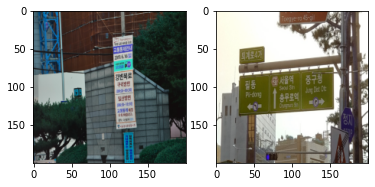

In [16]:
x1 = np.load(x_train_list[0])
x2 = np.load(x_val_list[0])

print(x1.shape, x2.shape)

plt.subplot(1, 2, 1)
plt.imshow(x1)
plt.subplot(1, 2, 2)
plt.imshow(x2)

In [17]:
train_gen = DataGenerator(list_IDs=x_train_list, 
                          labels=None, 
                          batch_size=16, 
                          dim=(200,200), 
                          n_channels=3, 
                          n_classes=None, 
                          shuffle=True)

val_gen = DataGenerator(list_IDs=x_val_list, 
                        labels=None, 
                        batch_size=16, 
                        dim=(200,200), 
                        n_channels=3, 
                        n_classes=None, 
                        shuffle=False)

In [18]:
upscale_factor = 4

inputs = Input(shape=(200, 200, 3))

net = Conv2D(filters=64, 
             kernel_size=5, 
             strides=1, 
             padding='same', 
             activation='relu')(inputs)

net = Conv2D(filters=64, 
             kernel_size=3, 
             strides=1, 
             padding='same', 
             activation='relu')(net)

net = Conv2D(filters=32, 
             kernel_size=3, 
             strides=1, 
             padding='same', 
             activation='relu')(net)

net = Conv2D(filters=upscale_factor**2, 
             kernel_size=3, 
             strides=1, 
             padding='same', 
             activation='relu')(net)

net = Subpixel(filters=3,
               kernel_size=3, 
               r=upscale_factor, 
               padding='same')(net)

outputs = Activation('relu')(net)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='mse')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 200, 200, 64)      4864      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 200, 200, 64)      36928     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 200, 200, 32)      18464     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 200, 200, 16)      4624      
_________________________________________________________________
subpixel_2 (Subpixel)        (None, 800, 800, 3)       6960      
_________________________________________________________________
activation_2 (Activation)    (None, 800, 800, 3)       0         
Total para

In [22]:
from DataGenerator import DataGenerator
## 먼저 기존의 np.load를 np_load_old에 저장해둠.
np_load_old = np.load

## 기존의 parameter을 바꿔줌
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [23]:
import numpy as np

In [19]:
history = model.fit_generator(train_gen, 
                              validation_data=val_gen, 
                              epochs=1, 
                              verbose=1, 
                              callbacks=[ModelCheckpoint(r'C:\Users\Yu_zzong\Desktop\Jupyter\GAN2\testtest.h5', 
                                                         monitor='val_loss', 
                                                         verbose=1, 
                                                         save_best_only=True)])

Epoch 1/1
  1/688 [..............................] - ETA: 12:21:51 - loss: 0.3072

KeyboardInterrupt: 

In [9]:
model.fit(train_gen, 
                              validation_data=val_gen, 
                              epochs=5 
                              verbose=1
                             )

SyntaxError: invalid syntax (<ipython-input-9-daee27016d8d>, line 4)

In [2]:
from keras.models import load_model
model.save('123epeeee5.h5')

NameError: name 'model' is not defined

In [65]:
from keras.models import model_from_json
from keras.models import load_model


model.save('testtest.h5')

## 모델 아키텍처 따로 저장
# 모델 아키텍처를 json 형식으로 저장
json_string = model.to_json()

# json 파일에서 모델 아키텍처 재구성
model = model_from_json(json_string)
"""
## Weights 따로 저장
model.save_weights()
"""

ValueError: Unknown layer: Subpixel

In [45]:
from keras.models import load_model

model.save('modeltest.h5')

from __future__ import absolute_import, division, print_function, unicode_literals # tensorflow와 tf.keras 불러오기~ import tensorflow as tf from tensorflow import keras # helper library 임포트 import numpy as np import matplotlib.pyplot as plt print(tf.__version__)

NameError: name 'model_from_json' is not defined

In [49]:
from __future__import absolute_import, division, print_function, unicode_literals 
# tensorflow와 tf.keras 불러오기~ import tensorflow as tf from tensorflow import keras 
# helper library 임포트 
import numpy as np 
import matplotlib.pyplot as plt 
print(tf.__version__)


SyntaxError: invalid syntax (<ipython-input-49-9637eda57a96>, line 1)

In [24]:
x_test_list = sorted(glob.glob(os.path.join(base_path, 'x_test', '*.npy')))
y_test_list = sorted(glob.glob(os.path.join(base_path, 'y_test', '*.npy')))

print(len(x_test_list), len(y_test_list))
print(x_test_list[0])
print(y_test_list[0])


6412 6412
E:\processed\x_test\000080.npy
E:\processed\y_test\000080.npy


In [25]:
test_idx = 80
print(x_test_list[0])
print(y_test_list[0])
x1_test = np.load(x_test_list[0])
y1_test = np.load(y_test_list[0])
print(x1_test.shape)
print(y1_test.shape)

E:\processed\x_test\000080.npy
E:\processed\y_test\000080.npy
(200, 200, 3)
(800, 800, 3)


In [22]:
test_idx = 5

x1_test = np.load(x_test_list[test_idx])
x1_test_resized = pyramid_expand(x1_test, 4)
y1_test = np.load(y_test_list[test_idx])
y_pred = model.predict(x1_test.reshape((1, 100, 100, 3)))

print(x1_test.shape, y1_test.shape)
x1_test = (x1_test * 255).astype(np.uint8)
x1_test_resized = (x1_test_resized * 255).astype(np.uint8)
y1_test = (y1_test * 255).astype(np.uint8)
y_pred = np.clip(y_pred.reshape((400, 400, 3)), 0, 1)

x1_test = cv2.cvtColor(x1_test, cv2.COLOR_BGR2RGB)
x1_test_resized = cv2.cvtColor(x1_test_resized, cv2.COLOR_BGR2RGB)
y1_test = cv2.cvtColor(y1_test, cv2.COLOR_BGR2RGB)
y_pred = cv2.cvtColor(y_pred, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 10))
plt.subplot(1, 4, 1)
plt.title('input')
plt.imshow(x1_test)
plt.subplot(1, 4, 2)
plt.title('resized')
plt.imshow(x1_test_resized)
plt.subplot(1, 4, 3)
plt.title('output')
plt.imshow(y_pred)
plt.subplot(1, 4, 4)
plt.title('groundtruth')
plt.imshow(y1_test)

cv2.imshow('image', x1_test)   
cv2.imshow('image_gray', y_pred) 

(100, 100, 3) (400, 400, 3)


error: OpenCV(4.2.0) c:\projects\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xe227985e::Set<3,4,-1>,struct cv::impl::A0xe227985e::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 12


In [11]:
  
from keras import backend as K
from keras.layers import Conv2D

"""
	Subpixel Layer as a child class of Conv2D. This layer accepts all normal
	arguments, with the exception of dilation_rate(). The argument r indicates
	the upsampling factor, which is applied to the normal output of Conv2D.
	The output of this layer will have the same number of channels as the
	indicated filter field, and thus works for grayscale, color, or as a a
	hidden layer.
	Arguments:
		*see Keras Docs for Conv2D args, noting that dilation_rate() is removed*
		r: upscaling factor, which is applied to the output of normal Conv2D
	A test is included, which performs super-resolution on the Cifar10 dataset.
	Since these images are small, only a scale factor of 2 is used. Test images
	are saved in the directory 'test_output/'. This test runs for 5 epochs,
	which can be altered in line 132. You can run this test by using the
	following commands:
	mkdir test_output
	python keras_subpixel.py
"""


class Subpixel(Conv2D):
    def __init__(self,
                 filters,
                 kernel_size,
                 r,
                 padding='valid',
                 data_format=None,
                 strides=(1,1),
                 activation=None,
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 bias_initializer='zeros',
                 kernel_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,
                 kernel_constraint=None,
                 bias_constraint=None,
                 **kwargs):
        super(Subpixel, self).__init__(
            filters=r*r*filters,
            kernel_size=kernel_size,
            strides=strides,
            padding=padding,
            data_format=data_format,
            activation=activation,
            use_bias=use_bias,
            kernel_initializer=kernel_initializer,
            bias_initializer=bias_initializer,
            kernel_regularizer=kernel_regularizer,
            bias_regularizer=bias_regularizer,
            activity_regularizer=activity_regularizer,
            kernel_constraint=kernel_constraint,
            bias_constraint=bias_constraint,
            **kwargs)
        self.r = r

    def _phase_shift(self, I):
        r = self.r
        bsize, a, b, c = I.get_shape().as_list()
        bsize = K.shape(I)[0] # Handling Dimension(None) type for undefined batch dim
        X = K.reshape(I, [bsize, a, b, int(c/(r*r)),r, r]) # bsize, a, b, c/(r*r), r, r
        X = K.permute_dimensions(X, (0, 1, 2, 5, 4, 3))  # bsize, a, b, r, r, c/(r*r)
        #Keras backend does not support tf.split, so in future versions this could be nicer
        X = [X[:,i,:,:,:,:] for i in range(a)] # a, [bsize, b, r, r, c/(r*r)
        X = K.concatenate(X, 2)  # bsize, b, a*r, r, c/(r*r)
        X = [X[:,i,:,:,:] for i in range(b)] # b, [bsize, r, r, c/(r*r)
        X = K.concatenate(X, 2)  # bsize, a*r, b*r, c/(r*r)
        return X

    def call(self, inputs):
        return self._phase_shift(super(Subpixel, self).call(inputs))

    def compute_output_shape(self, input_shape):
        unshifted = super(Subpixel, self).compute_output_shape(input_shape)
        return (unshifted[0], self.r*unshifted[1], self.r*unshifted[2], int(unshifted[3]/(self.r*self.r)))

    def get_config(self):
        config = super(Conv2D, self).get_config()
        #config.pop('rank')
        config.pop('dilation_rate')
        config['filters'] = int(config['filters'] / self.r*self.r)
        config['r'] = self.r
        return config
#test = keras.models.load_model('test.h5', custom_objects={'Subpixel': Subpixel})

In [25]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
model = tf.keras.models.load_model('123ep5.h5')

ValueError: Unknown layer: Subpixel

In [66]:
test_idx = 81

# 저해상도 이미지(input)
x1_test = np.load(x_test_list[test_idx])

# 저해상도 이미지 확대시킨 이미지
x1_test_resized = pyramid_expand(x1_test, 
                                 4,
                                 multichannel=True) # 색깔 채널 조건 추가.

# 정답 이미지
y1_test = np.load(y_test_list[test_idx])

# 모델이 예측한 이미지(output)
y_pred = model.premdict(x1_test.reshape((1, 200, 200, 3)))

print(x1_test.shape, y1_test.shape)

x1_test = (x1_test * 255).astype(np.uint8) # 저해상도 이미지(input)
x1_test_resized = (x1_test_resized * 255).astype(np.uint8) # 저해상도 이미지 확대시킨 이미지
y_pred = np.clip(y_pred.reshape((800, 800, 3)), 0, 1) # 모델이 예측한 이미지(output)
y1_test = (y1_test * 255).astype(np.uint8) # 정답 이미지

x1_test = cv2.cvtColor(x1_test, 
                       cv2.COLOR_BGR2RGB) # 저해상도 이미지(input)

x1_test_resized = cv2.cvtColor(x1_test_resized, 
                               cv2.COLOR_BGR2RGB) # 저해상도 이미지 확대시킨 이미지
y_pred = cv2.cvtColor(y_pred, 
                      cv2.COLOR_BGR2RGB)# 모델이 예측한 이미지(output)
y1_test = cv2.cvtColor(y1_test, 
                       cv2.COLOR_BGR2RGB)# 정답 이미지

fig, ax = plt.subplots(1,4,figsize=(15, 10))
ax = ax.ravel()
y1_test
ax[0].set_title('input')
ax[0].imshow(x1_test)

ax[1].set_title('resized')
ax[1].imshow(x1_test_resized)

ax[2].set_title('output')
ax[2].imshow(y_pred)

ax[3].set_title('groundtruth')
ax[3].imshow(y1_test)

AttributeError: 'Model' object has no attribute 'premdict'

In [42]:
cv2.imshow("Moon", x1_test_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()